In [1]:
#Install dependecy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib  inline

In [2]:
# load the dataset

df = pd.read_csv('ex1data1.txt',names = ['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


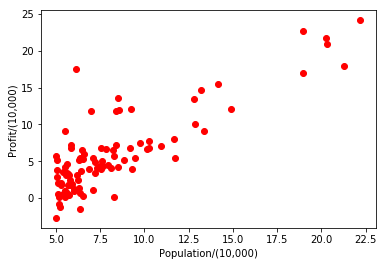

In [3]:
#Plot the data with scaled units

plt.scatter(df['Population'],df['Profit'],c='r')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')
plt.show()

In [4]:
# making data
X = df.as_matrix(columns = ['Population'])
y = df.as_matrix(columns = ['Profit'])

# No of exaples 
m = X.shape[0]

# No of features 
n = y.shape[1] + 1

#Initialize theta
theta = np.zeros(n)
theta = theta.reshape((len(theta), 1))

#adding extra feature theta0 as 1 
X = np.append(np.ones((m, 1)), X,axis=1)

In [5]:
# Compute Cost function
def computeCost(X, y, theta):
    m  = y.size
    h = np.dot(X,theta)
    J = (np.sum(np.square(h-y))) / (2 * m)
    return J

In [6]:
# Calucating cost function and theta


def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    J_history = []
    m = y.size  # number of training examples

    for i in range(num_iters):

        h = np.dot(X, theta)
        theta = theta - ((alpha / m) * (np.dot(X.T,(h - y)))) 
        
        
        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta)) 
    return theta,J_history[len(J_history)-1]




In [7]:
final_theta,loss = gradientDescent(X, y, theta, 0.01, 1500)
print('loss :',loss)
print('fibnal theta :',final_theta)

('loss :', 4.4833882565877259)
('fibnal theta :', array([[-3.63029144],
       [ 1.16636235]]))


In [8]:
x_line = np.arange(1,23).reshape(-1,1)
y_line = final_theta[0] + x_line * final_theta[1]

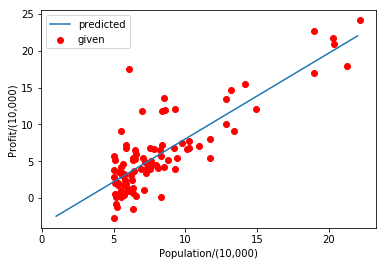

In [9]:
plt.scatter(df['Population'],df['Profit'],c='r',label='given')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')
plt.plot(x_line,y_line,label='predicted')
plt.legend()
plt.show()